In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load data
results_path = Path('../../../results/all/experiment_results.csv')
df = pd.read_csv(results_path)

# Filter for real datasets
real_datasets = ['bank_marketing', 'breast_cancer', 'adult_income', 'pima']
df_real = df[df['dataset_id'].isin(real_datasets)]

print(f"Loaded {len(df_real)} real experiments")
print(f"Methods: {df_real['model_name'].unique()}")
print(f"Datasets: {df_real['dataset_id'].unique()}")


Loaded 400 real experiments
Methods: ['lasso' 'lassonet' 'nimo' 'random_forest' 'neural_net']
Datasets: ['breast_cancer' 'pima' 'bank_marketing' 'adult_income']


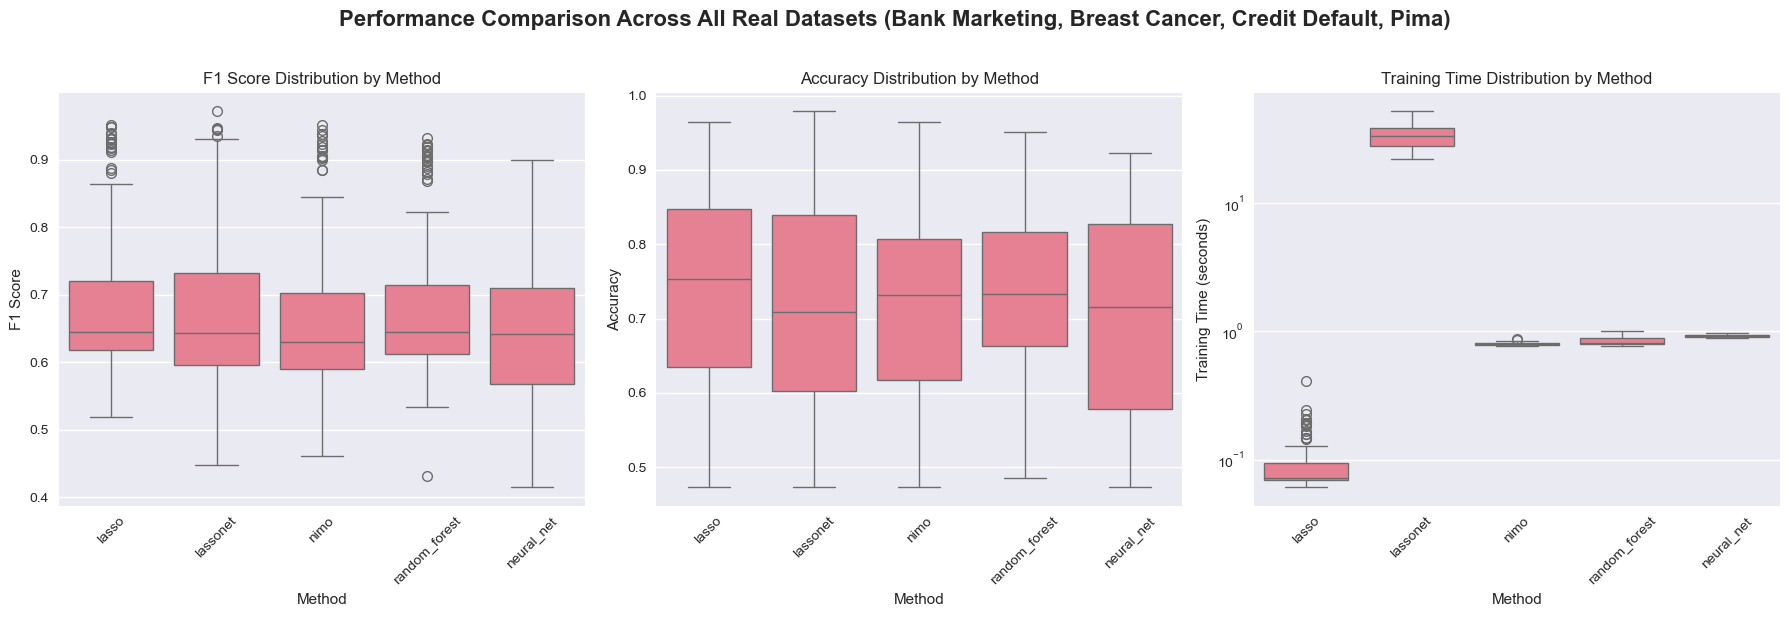

In [11]:
# 1. Boxplots for F1, Accuracy, Time
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Add main title
fig.suptitle('Performance Comparison Across All Real Datasets (Bank Marketing, Breast Cancer, Credit Default, Pima)', fontsize=16, fontweight='bold', y=1.02)

# F1 Score
sns.boxplot(data=df_real, x='model_name', y='f1', ax=axes[0])
axes[0].set_title('F1 Score Distribution by Method')
axes[0].set_xlabel('Method')
axes[0].set_ylabel('F1 Score')
axes[0].tick_params(axis='x', rotation=45)

# Accuracy
sns.boxplot(data=df_real, x='model_name', y='accuracy', ax=axes[1])
axes[1].set_title('Accuracy Distribution by Method')
axes[1].set_xlabel('Method')
axes[1].set_ylabel('Accuracy')
axes[1].tick_params(axis='x', rotation=45)

# Training Time (logarithmic scale)
sns.boxplot(data=df_real, x='model_name', y='training_time', ax=axes[2])
axes[2].set_title('Training Time Distribution by Method')
axes[2].set_xlabel('Method')
axes[2].set_ylabel('Training Time (seconds)')
axes[2].set_yscale('log')  # Logarithmic scale
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


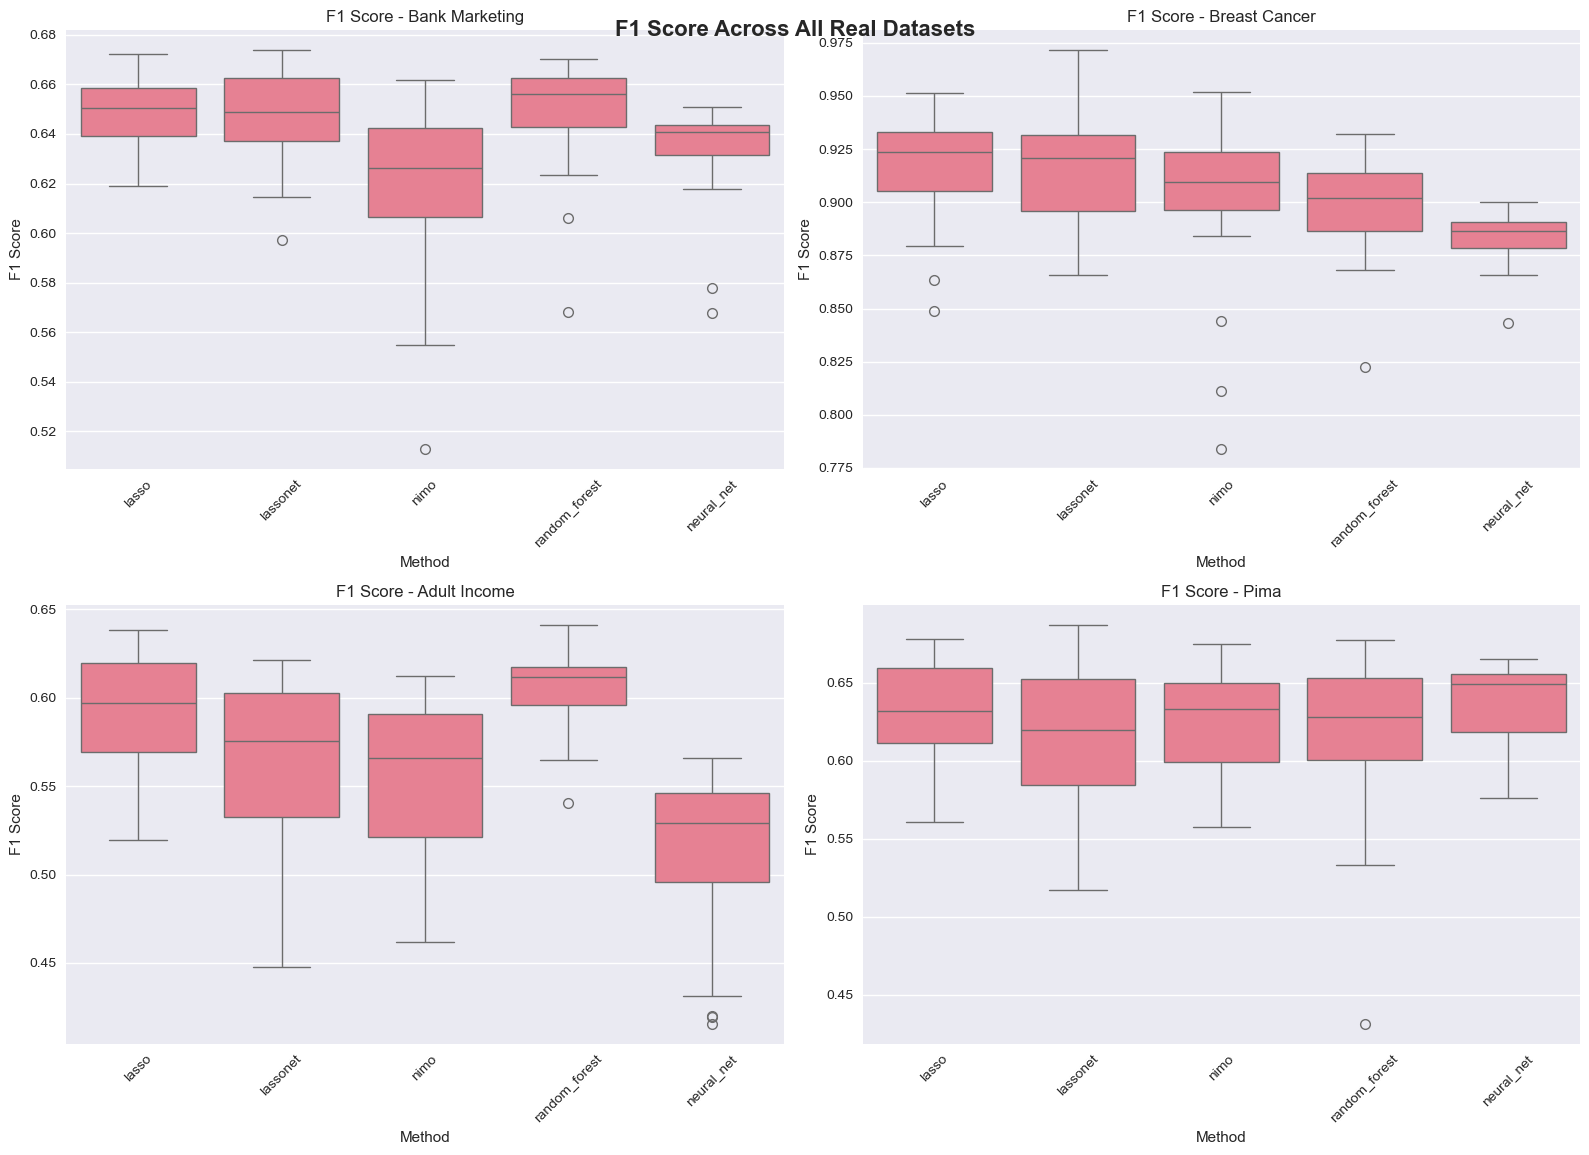

In [12]:
,# 4. Performance by Dataset - F1 Score
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Add main title
fig.suptitle('F1 Score Across All Real Datasets', fontsize=16, fontweight='bold', y=0.95)

for i, dataset in enumerate(real_datasets):
    dataset_data = df_real[df_real['dataset_id'] == dataset]
    
    # F1 Score by method for this dataset
    sns.boxplot(data=dataset_data, x='model_name', y='f1', ax=axes[i])
    axes[i].set_title(f'F1 Score - {dataset.replace("_", " ").title()}')
    axes[i].set_xlabel('Method')
    axes[i].set_ylabel('F1 Score')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


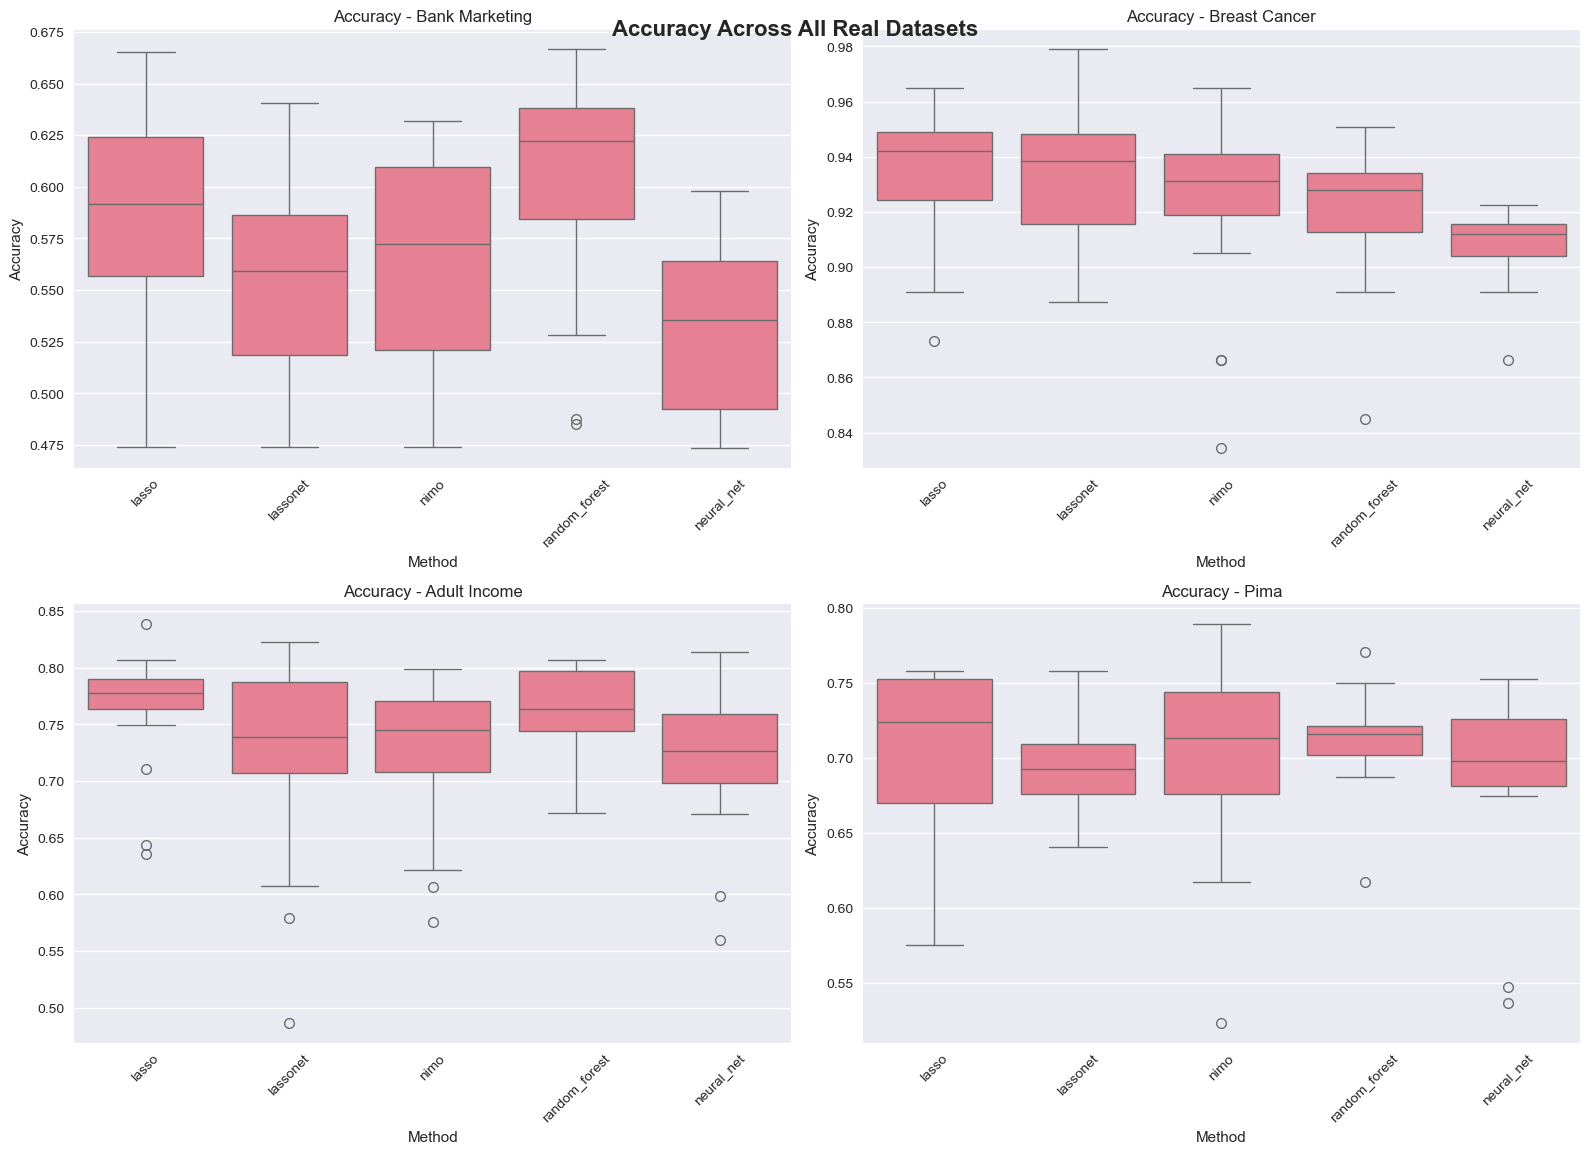

In [15]:
# 5. Performance by Dataset - Accuracy
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Add main title
fig.suptitle('Accuracy Across All Real Datasets', fontsize=16, fontweight='bold', y=0.95)

for i, dataset in enumerate(real_datasets):
    dataset_data = df_real[df_real['dataset_id'] == dataset]
    
    # Accuracy by method for this dataset
    sns.boxplot(data=dataset_data, x='model_name', y='accuracy', ax=axes[i])
    axes[i].set_title(f'Accuracy - {dataset.replace("_", " ").title()}')
    axes[i].set_xlabel('Method')
    axes[i].set_ylabel('Accuracy')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [14]:
# 6. Summary Statistics Table
print("\n=== PERFORMANCE SUMMARY - REAL DATASETS ===")
print("\nF1 Score:")
f1_summary = df_real.groupby('model_name')['f1'].agg(['mean', 'std', 'min', 'max']).round(4)
print(f1_summary)

print("\nAccuracy:")
acc_summary = df_real.groupby('model_name')['accuracy'].agg(['mean', 'std', 'min', 'max']).round(4)
print(acc_summary)

print("\nTraining Time (seconds):")
time_summary = df_real.groupby('model_name')['training_time'].agg(['mean', 'std', 'min', 'max']).round(4)
print(time_summary)



=== PERFORMANCE SUMMARY - REAL DATASETS ===

F1 Score:
                 mean     std     min     max
model_name                                   
lasso          0.6954  0.1331  0.5195  0.9515
lassonet       0.6842  0.1438  0.4480  0.9714
neural_net     0.6649  0.1399  0.4158  0.9000
nimo           0.6746  0.1392  0.4617  0.9519
random_forest  0.6905  0.1266  0.4316  0.9320

Accuracy:
                 mean     std     min     max
model_name                                   
lasso          0.7473  0.1343  0.4738  0.9648
lassonet       0.7264  0.1462  0.4738  0.9789
neural_net     0.7134  0.1435  0.4737  0.9225
nimo           0.7291  0.1386  0.4738  0.9648
random_forest  0.7491  0.1214  0.4849  0.9507

Training Time (seconds):
                  mean     std      min      max
model_name                                      
lasso           0.1004  0.0575   0.0614   0.4088
lassonet       33.9981  8.6586  21.9797  51.4113
neural_net      0.9188  0.0200   0.8878   0.9664
nimo            0.